<a href="https://colab.research.google.com/github/zephstee/machine_learning-Project/blob/main/Brain_Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BRAIN STROKE PREDICTION**


Excited to share my first #Machine Learning project! This project delves into the realm of supervised machine learning, employing three distinct classification models: K-Nearest Neighbors (KNN), Naive Bayes, and Support Vector Machine (SVM) algorithms. The focal point of the analysis is a comprehensive dataset encompassing essential medical information. Through meticulous exploration and preprocessing of the data, predictive models were crafted to discern whether a given patient is prone to experiencing a brain stroke. The ultimate goal of this project is to furnish healthcare professionals with a tool that aids in early detection and risk assessment for potential brain strokes.

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/brain_stroke1.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4979 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4980 non-null   object 
 6   Residence_type     4980 non-null   object 
 7   avg_glucose_level  4978 non-null   float64
 8   bmi                4980 non-null   float64
 9   smoking_status     4979 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981,4979.000000,4981.000000,4981.000000,4981,4980,4980,4978.000000,4980.000000,4979,4981.000000
unique,3,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2907,NaN,NaN,NaN,3280,2859,2531,NaN,NaN,1838,NaN
mean,NaN,43.418823,0.096165,0.055210,NaN,NaN,NaN,105.946107,28.499819,NaN,0.049789
std,NaN,22.665511,0.294848,0.228412,NaN,NaN,NaN,45.084016,6.790151,NaN,0.217531
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,14.000000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.232500,23.700000,NaN,0.000000
50%,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.850000,28.100000,NaN,0.000000
75%,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,113.857500,32.600000,NaN,0.000000


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.shape

(4981, 11)


Checking for Missing Values:


In [ ]:
df.isna().sum()

gender               0
age                  2
hypertension         0
heart_disease        0
ever_married         0
work_type            1
Residence_type       1
avg_glucose_level    3
bmi                  1
smoking_status       2
stroke               0
dtype: int64

Handling Missing values:

In [ ]:

age=df['age'].mean()
df['age'].fillna(age,inplace=True)
work_type=df['work_type'].mode()[0]
df['work_type'].fillna(work_type,inplace=True)
residence_type=df['Residence_type'].mode()[0]
df['Residence_type'].fillna(residence_type,inplace=True)
avg_glucose_level=df['avg_glucose_level'].mean()
df['avg_glucose_level'].fillna(avg_glucose_level,inplace=True)
bmi=df['bmi'].mean()
df['bmi'].fillna(bmi,inplace=True)
smoking_status=df['smoking_status'].mode()[0]
df['smoking_status'].fillna(smoking_status,inplace=True)

df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Encoding String Values:

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['gender']=label.fit_transform(df['gender'])
df['ever_married']=label.fit_transform(df['ever_married'])
df['work_type']=label.fit_transform(df['work_type'])
df['Residence_type']=label.fit_transform(df['Residence_type'])
df['smoking_status']=label.fit_transform(df['smoking_status'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,67.0,0,1,1,1,1,228.69,36.6,1,1
1,2,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,2,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,2,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,2,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,2,40.0,0,0,1,1,0,83.94,30.0,3,0



Splitting Data into Input and Output


In [ ]:
x=df.iloc[:,:-1].values
x

array([[  2.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  2.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       [  0.  ,  49.  ,   0.  , ..., 171.23,  34.4 ,   3.  ],
       ...,
       [  0.  ,  45.  ,   1.  , ...,  95.02,  31.8 ,   3.  ],
       [  2.  ,  40.  ,   0.  , ...,  83.94,  30.  ,   3.  ],
       [  0.  ,  80.  ,   1.  , ...,  83.75,  29.1 ,   2.  ]])

In [ ]:
y=df.iloc[:,-1].values
y

array([1, 1, 1, ..., 0, 0, 0])



Splitting Data into Training Data and Testing Data


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  0.  ,  56.  ,   0.  , ...,  98.14,  32.7 ,   1.  ],
       [  2.  ,  35.  ,   0.  , ...,  82.81,  23.9 ,   2.  ],
       [  2.  ,  15.  ,   0.  , ...,  78.59,  25.1 ,   0.  ],
       ...,
       [  2.  ,  13.  ,   0.  , ...,  90.6 ,  16.9 ,   2.  ],
       [  0.  ,   0.48,   0.  , ..., 118.75,  17.4 ,   0.  ],
       [  0.  ,  57.  ,   0.  , ..., 128.28,  34.2 ,   2.  ]])

In [ ]:
x_test

array([[  0.  ,  65.  ,   1.  , ..., 180.76,  26.9 ,   0.  ],
       [  0.  ,  11.  ,   0.  , ...,  93.51,  20.8 ,   0.  ],
       [  2.  ,   1.56,   0.  , ...,  93.74,  20.1 ,   0.  ],
       ...,
       [  0.  ,  47.  ,   0.  , ...,  56.67,  24.4 ,   2.  ],
       [  2.  ,   0.88,   0.  , ...,  90.62,  22.4 ,   0.  ],
       [  0.  ,  78.  ,   0.  , ..., 137.74,  34.9 ,   1.  ]])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

Applying Normalization



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.85378703,  0.54616469, -0.31901397, ..., -0.17500131,
         0.61192312, -0.34363867],
       [ 1.17159684, -0.37103495, -0.31901397, ..., -0.51480704,
        -0.68627693,  0.59150918],
       [ 1.17159684, -1.24455843, -0.31901397, ..., -0.60834783,
        -0.50924965, -1.27878651],
       ...,
       [ 1.17159684, -1.33191077, -0.31901397, ..., -0.34213342,
        -1.71893606,  0.59150918],
       [-0.85378703, -1.87873647, -0.31901397, ...,  0.28184124,
        -1.64517469, -1.27878651],
       [-0.85378703,  0.58984087, -0.31901397, ...,  0.49308381,
         0.83320722,  0.59150918]])

In [ ]:
x_test

array([[-0.85378703,  0.93925025,  3.13465899, ...,  1.65635877,
        -0.24370873, -1.27878651],
       [-0.85378703, -1.41926312, -0.31901397, ..., -0.27763017,
        -1.1435974 , -1.27878651],
       [ 1.17159684, -1.8315662 , -0.31901397, ..., -0.27253198,
        -1.24686331, -1.27878651],
       ...,
       [-0.85378703,  0.15307913, -0.31901397, ..., -1.09422791,
        -0.61251556,  0.59150918],
       [ 1.17159684, -1.861266  , -0.31901397, ..., -0.34169009,
        -0.90756103, -1.27878651],
       [-0.85378703,  1.50704051, -0.31901397, ...,  0.70277476,
         0.93647313, -0.34363867]])

**MODEL** **CREATION**

K-nearest Neighbors Algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
mat=confusion_matrix(y_test,y_pred)
mat

array([[1411,    6],
       [  78,    0]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9438127090301003

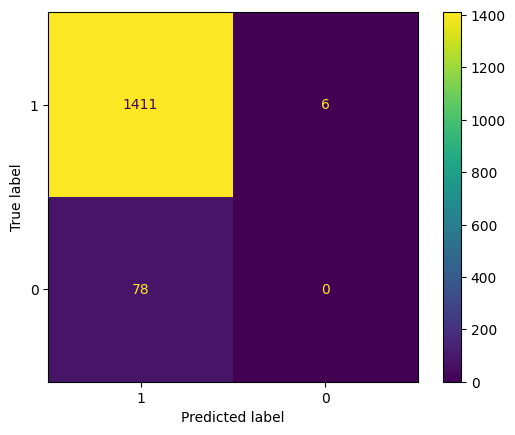

In [ ]:
label=[1,0]
dis=ConfusionMatrixDisplay(mat,display_labels=label)
dis.plot()

Naive-Bayes Alorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[1259,  158],
       [  35,   43]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.8709030100334448

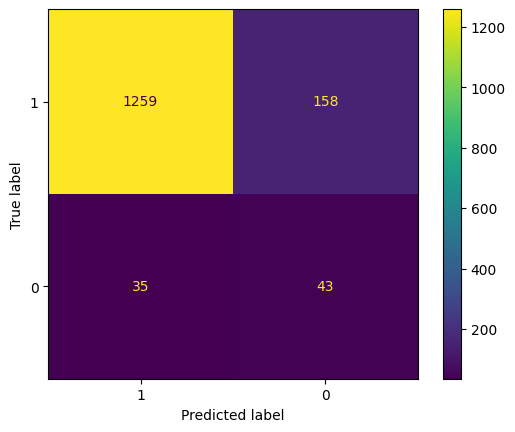

In [ ]:
lab=[1,0]
dis=ConfusionMatrixDisplay(mat,display_labels=lab)
dis.plot()

Support Vector Machine Algorithm

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
mat=confusion_matrix(y_test,y_pred)
mat

array([[1417,    0],
       [  78,    0]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9478260869565217

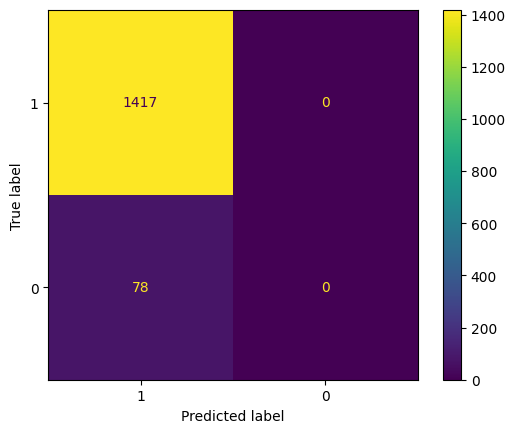

In [ ]:
lab=[1,0]
dis=ConfusionMatrixDisplay(mat,display_labels=lab)
dis.plot()